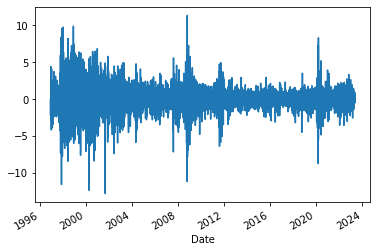

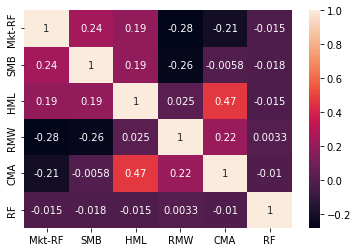

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 snp-rf   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     57.48
Date:                Sat, 27 May 2023   Prob (F-statistic):           2.91e-47
Time:                        14:33:43   Log-Likelihood:                -6611.5
No. Observations:                4114   AIC:                         1.323e+04
Df Residuals:                    4109   BIC:                         1.326e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0044      0.019      0.231      0.817      -0.033       0.041
Mkt-RF         0.2078      0.016     12.876      0.000       0.176       0.239
SMB           -0.0740      0.031     -2.385      0.017      -0.135      -0.013
HML            0.0718      0.027      2.636      0.008       0.018       0.125
CMA           -0.1217      0.059     -2.058      0.040      -0.238      -0.006
==============================================================================
Omnibus:                      848.327   Durbin-Watson:                   2.182
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13082.406
Skew:                          -0.546   Prob(JB):                         0.00
Kurtosis:                      11.668   Cond. No.                         4.31
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3]:
import pandas_datareader as pdr
import FinanceDataReader as fdr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pandas as pd

snp = fdr.DataReader('KS11')
snp_ret = np.log(snp['Close']) - np.log(snp['Close'].shift(1))
snp_ret = snp_ret.dropna() * 100
snp_ret.name = 'snp_ret'

snp_ret.describe()
snp_ret.plot()
plt.show()

ff5 = pdr.DataReader('F-F_Research_Data_5_Factors_2x3_daily', 'famafrench', '2006')[0]
ff5.describe()

sns.heatmap(ff5.corr(), annot=True)
plt.show()

df = pd.concat([ff5, snp_ret], axis=1).dropna()

df['snp-rf'] = df.snp_ret - df.RF
y = df['snp-rf']
x = df[['Mkt-RF', 'SMB', 'HML', 'CMA']]
x = sm.add_constant(x)

model = sm.OLS(y, x)
result = model.fit()
result.summary()


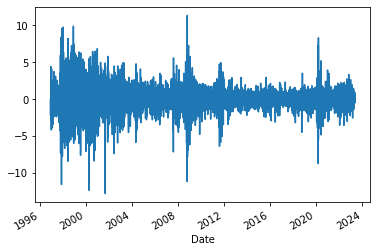

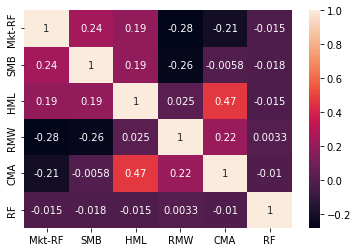

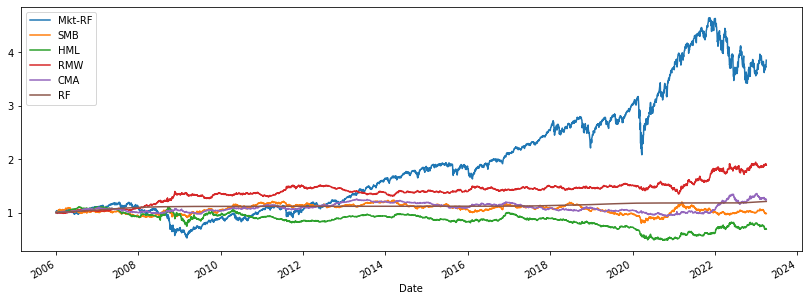

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 snp-rf   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     4.945
Date:                Fri, 26 May 2023   Prob (F-statistic):            0.00157
Time:                        21:15:42   Log-Likelihood:                -40.970
No. Observations:                  34   AIC:                             95.94
Df Residuals:                      27   BIC:                             106.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6241      1.051      0.594      0.558      -1.532       2.780
Mkt-RF         0.5241      0.150      3.501      0.002       0.217       0.831
SMB            0.1694      0.268      0.632      0.533      -0.381       0.719
HML            0.3222      0.269      1.197      0.242      -0.230       0.874
RMW            0.7545      0.564      1.339      0.192      -0.402       1.911
CMA           -0.4770      0.637     -0.749      0.460      -1.784       0.830
GDP        -4.108e-05    5.8e-05     -0.708      0.485      -0.000     7.8e-05
==============================================================================
Omnibus:                        0.499   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.779   Jarque-Bera (JB):                0.598
Skew:                          -0.247   Prob(JB):                        0.742
Kurtosis:                       2.578   Cond. No.                     1.35e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [3]:
import pandas_datareader as pdr
import FinanceDataReader as fdr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pandas as pd

snp = fdr.DataReader('KS11')
snp_ret = np.log(snp['Close']) - np.log(snp['Close'].shift(1))
snp_ret = snp_ret.dropna() * 100
snp_ret.name = 'snp_ret'

snp_ret.describe()
snp_ret.plot()
plt.show()

ff5 = pdr.DataReader('F-F_Research_Data_5_Factors_2x3_daily', 'famafrench', '2006')[0]
ff5.describe()

sns.heatmap(ff5.corr(), annot=True)
plt.show()

(1 + ff5 / 100).cumprod().plot(figsize=(14, 5))
plt.show()

# GDP 성장률 데이터 가져오기
gdp_growth = pdr.DataReader('GDP', data_source='fred', start='2006')['GDP']

df = pd.concat([ff5, snp_ret, gdp_growth], axis=1).dropna()

df['snp-rf'] = df.snp_ret - df.RF
y = df['snp-rf']
x = df[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'GDP']]
x = sm.add_constant(x)

model = sm.OLS(y, x)
result = model.fit()
result.summary()

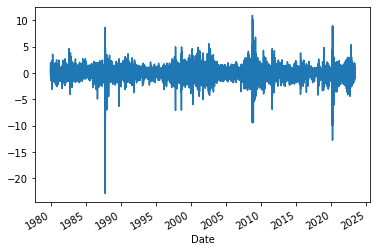

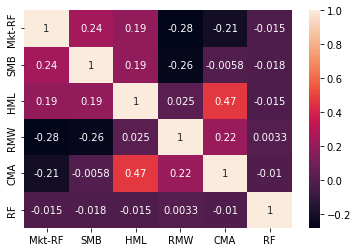

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 snp-rf   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 3.332e+05
Date:                Fri, 26 May 2023   Prob (F-statistic):               0.00
Time:                        22:09:00   Log-Likelihood:                 5724.8
No. Observations:                4341   AIC:                        -1.144e+04
Df Residuals:                    4335   BIC:                        -1.140e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0174      0.001    -17.624      0.000      -0.019      -0.015
Mkt-RF         1.0069      0.001   1166.514      0.000       1.005       1.009
SMB           -0.1209      0.002    -72.591      0.000      -0.124      -0.118
HML            0.0313      0.001     21.900      0.000       0.029       0.034
RMW            0.0661      0.002     28.241      0.000       0.061       0.071
CMA            0.0317      0.003     10.143      0.000       0.026       0.038
==============================================================================
Omnibus:                     2276.910   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            72746.041
Skew:                          -1.900   Prob(JB):                         0.00
Kurtosis:                      22.691   Cond. No.                         4.38
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
import pandas_datareader as pdr
import FinanceDataReader as fdr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pandas as pd

snp = fdr.DataReader('us500')
snp_ret = np.log(snp['Close']) - np.log(snp['Close'].shift(1))
snp_ret = snp_ret.dropna() * 100
snp_ret.name = 'snp_ret'

snp_ret.describe()
snp_ret.plot()
plt.show()

ff5 = pdr.DataReader('F-F_Research_Data_5_Factors_2x3_daily', 'famafrench', '2006')[0]
ff5.describe()

sns.heatmap(ff5.corr(), annot=True)
plt.show()



df = pd.concat([ff5, snp_ret], axis=1).dropna()

df['snp-rf'] = df.snp_ret - df.RF
y = df['snp-rf']
x = df[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']]
x = sm.add_constant(x)

model = sm.OLS(y, x)
result = model.fit()
result.summary()

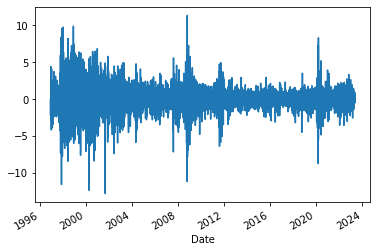

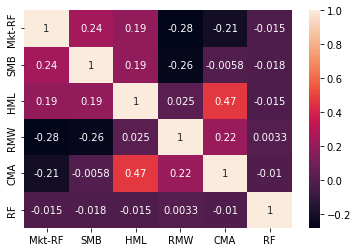

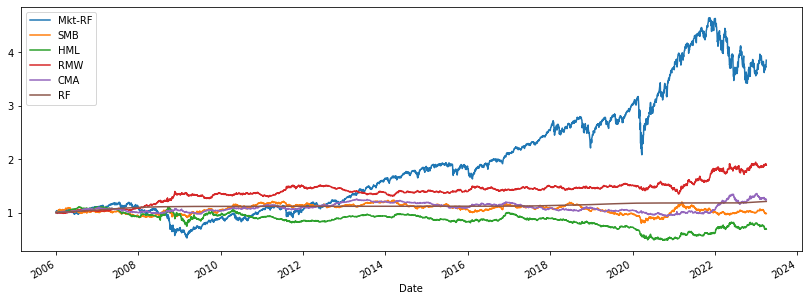

MissingDataError: exog contains inf or nans

In [7]:
import pandas_datareader as pdr
import FinanceDataReader as fdr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pandas as pd

snp = fdr.DataReader('KS11')
snp_ret = np.log(snp['Close']) - np.log(snp['Close'].shift(1))
snp_ret = snp_ret.dropna() * 100
snp_ret.name = 'snp_ret'

snp_ret.describe()
snp_ret.plot()
plt.show()

ff5 = pdr.DataReader('F-F_Research_Data_5_Factors_2x3_daily', 'famafrench', '2006')[0]
ff5.describe()

sns.heatmap(ff5.corr(), annot=True)
plt.show()

(1 + ff5 / 100).cumprod().plot(figsize=(14, 5))
plt.show()

df = pd.concat([ff5, snp_ret], axis=1).dropna()

df['snp-rf'] = df.snp_ret - df.RF
y = df['snp-rf']
x = df[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']]
x = sm.add_constant(x)
# 한국(KRW) 환율 데이터 가져오기
korea_exchange = fdr.DataReader('USD/KRW', start='2006-01-01', end='2023-05-26')
korea_exchange = korea_exchange['Close']



# 데이터프레임에 환율 데이터 추가
df['korea_exchange'] = korea_exchange


# 모델 실행을 위한 변수 설정
y = df['snp-rf']
x = df[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'korea_exchange']]
x = sm.add_constant(x)

df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()

# 회귀 모델 실행
model = sm.OLS(y, x)
result = model.fit()
result.summary()

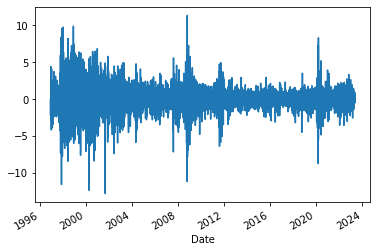

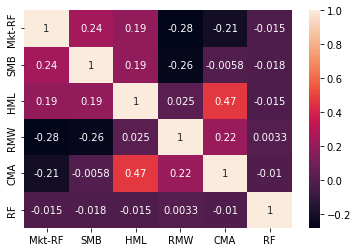

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 snp-rf   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     46.55
Date:                Sat, 27 May 2023   Prob (F-statistic):           6.16e-47
Time:                        15:02:53   Log-Likelihood:                -6563.5
No. Observations:                4089   AIC:                         1.314e+04
Df Residuals:                    4083   BIC:                         1.318e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0044      0.108      0.041      0.968      -0.207       0.216
Mkt-RF             0.2103      0.016     13.009      0.000       0.179       0.242
SMB               -0.0795      0.031     -2.557      0.011      -0.140      -0.019
HML                0.0726      0.027      2.659      0.008       0.019       0.126
CMA               -0.1147      0.059     -1.933      0.053      -0.231       0.002
korea_exchange  1.286e-05      0.010      0.001      0.999      -0.019       0.019
==============================================================================
Omnibus:                      858.141   Durbin-Watson:                   2.177
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13217.040
Skew:                          -0.566   Prob(JB):                         0.00
Kurtosis:                      11.735   Cond. No.                         63.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
import pandas_datareader as pdr
import FinanceDataReader as fdr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pandas as pd

snp = fdr.DataReader('KS11')
snp_ret = np.log(snp['Close']) - np.log(snp['Close'].shift(1))
snp_ret = snp_ret.dropna() * 100
snp_ret.name = 'snp_ret'

snp_ret.describe()
snp_ret.plot()
plt.show()

ff5 = pdr.DataReader('F-F_Research_Data_5_Factors_2x3_daily', 'famafrench', '2006')[0]
ff5.describe()

sns.heatmap(ff5.corr(), annot=True)
plt.show()

df = pd.concat([ff5, snp_ret], axis=1).dropna()

df['snp-rf'] = df.snp_ret - df.RF


korea_exchange = fdr.DataReader('JPY/KRW', start='2006-01-01', end='2023-05-26')
korea_exchange = korea_exchange['Close']


df['korea_exchange'] = korea_exchange



df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()


y = df['snp-rf']
x = df[['Mkt-RF', 'SMB', 'HML','CMA', 'korea_exchange']]
x = sm.add_constant(x)

model = sm.OLS(y, x)
result = model.fit()
result.summary()
